## Exercise 9.1
### 1. Use kNN to fit a classification model


Scikit-learn has a lot of tools for creating synthetic datasets, which are great for testing machine learning algorithms. Here we are going to utilize the `make_blobs()` method to generate a dataset, which will then be used for a KNN classification exercise.

#### Instructions (1 point)
- `X_train` and `y_train` are numpy arrays and will be used for fitting the knn model. Print out the shape of `X_train` and `y_train`.

In [2]:
# all main imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
# This code generates a dataset of 500 samples separated into four classes with a total of two features.
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 2, random_state = 42)

# use the first 400 observations to train the model
X_train = X[:400]
y_train = y[:400]

# X_train and y_train will be used for fitting the knn model. Print out the shape of `X_train` and `y_train`.
display(X_train.shape, y_train.shape)


(400, 2)

(400,)

#### Instructions (1 point)
- print out the first 5 rows of X and y

In [3]:
display(X_train[0:5], y_train[0:5])

array([[ -6.5397811 ,   5.91717007],
       [-12.27340048,  -6.98869933],
       [  9.0194847 ,   0.35657311],
       [ -3.29341393,   6.08725623],
       [ -4.47719935,  -7.69626034]])

array([3, 2, 1, 0, 2])

Before we apply the machine learning algorithm, we first visualize data by creating a scatter plot and observe the patterns.
#### Instructions (1 point)
- create a scatter plot using `X_train[:,0]` as the x axis and `X_train[:,1]` as the y axis. Use `y_train` as the color.

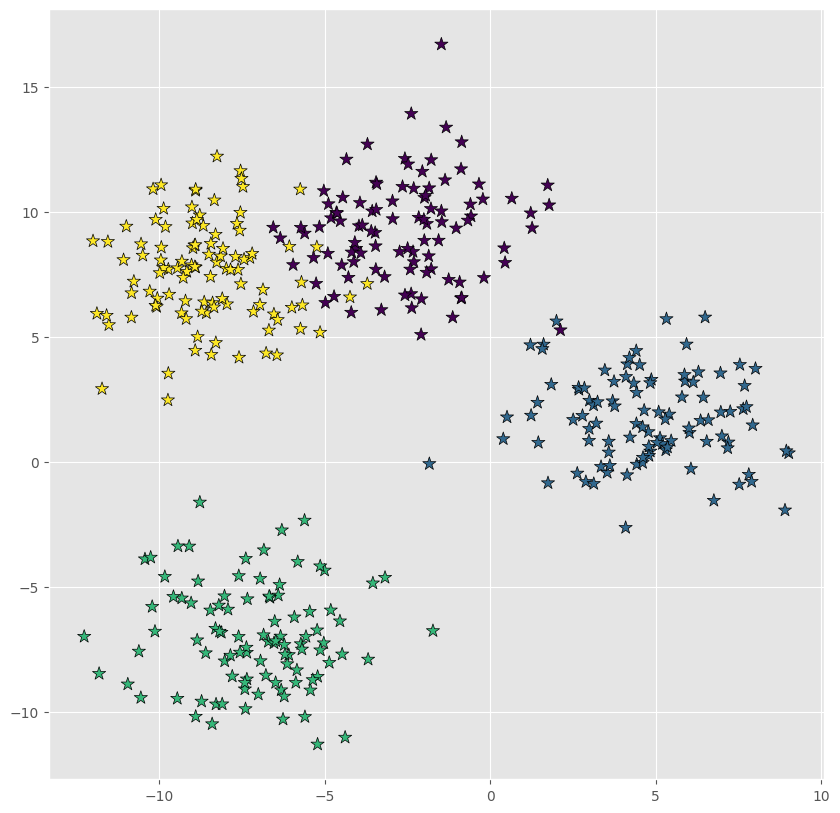

In [4]:
plt.style.use('ggplot')
plt.figure(figsize = (10,10))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker= '*', s=100, edgecolors='black')
plt.show()

#### Instructions (2 points)
- Import `KNeighborsClassifier` from `sklearn.neighbors`.
- Instantiate a `KNeighborsClassifier` called `knn5` with `5` neighbors by specifying the `n_neighbors` parameter. Instantiate another one called `knn1` with `1` neighbor.
- Fit the classifiers `knn5` and `knn1` to the data `X_train` and `y_train` using the `.fit()` method.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors=5)
knn1 = KNeighborsClassifier(n_neighbors=1)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 2. k-Nearest Neighbors: Predict

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. 
The `accuracy_score()` function in the module `sklearn.metrics` can be used to calculate the accuracy of the prediction. To do this, you can pass the true label of the data and the predicted label of the data as arguments to `accuracy_score()`.

#### Instructions (2 points)

- Use knn5 to predict the label of the new data points in `X_test`, and store the results in `y_pred_5`.
- Use knn1 to predict the label of the new data points in `X_test`, and store the results in `y_pred_1`.
- print out the accuracy score of knn5 and knn1 by calling `accuracy_score()`. For each classifier, you need to pass the true label of the data (i.e., `y_test`) and the predicted label of the data as arguments.

In [6]:
# we use the last 100 observations to test the model
X_test = X[400:]
y_test = y[400:]

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5))
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1))


Accuracy with k=5 0.95
Accuracy with k=1 0.93


We can compare the classification results from the two classifiers by visualizing the outputs of the two.
#### Instructions (1 point)
- In the first subplot, create a scatter plot using `X_test[:,0]` as the x axis and `X_test[:,1]` as the y axis. Use `y_pred_5` as the color.
- In the second subplot, create a scatter plot using `X_test[:,0]` as the x axis and `X_test[:,1]` as the y axis. Use `y_pred_1` as the color.


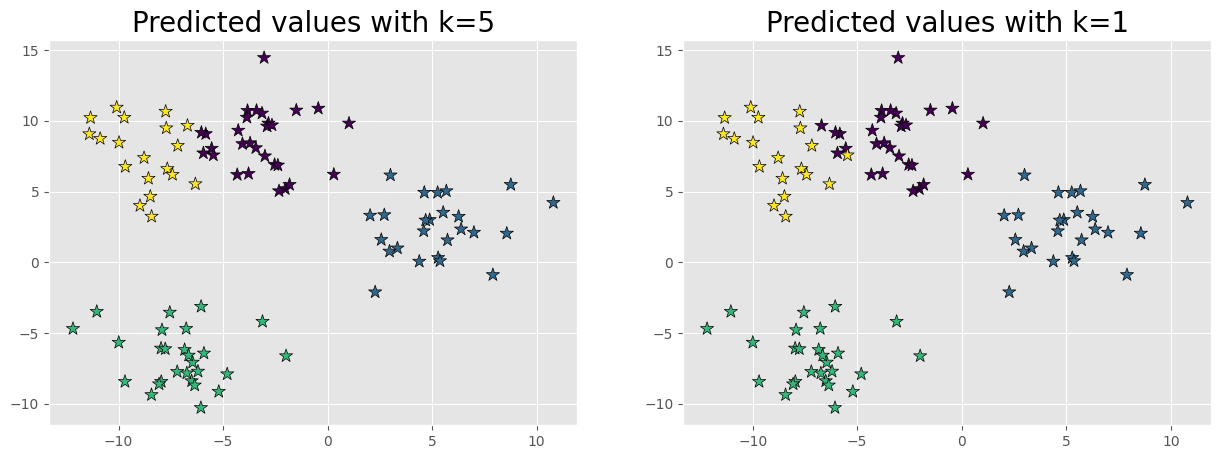

In [7]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100, edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100, edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

### 3. Decision tree classifier

Now we apply a decision tree classifier to the same dataset.
#### Instructions (3 points)
- import `DecisionTreeClassifier` from `sklearn.tree`
- create a Decision Tree classifer object `dt`, using parameters `'gini'` for `criterion` and `4` for `max_depth`.
- use `dt` to fit data `X_train` and `y_train`.
- use `dt` to predict the label of `X_test`, store the results in `y_pred`.
- print out the accuracy score of the prediction using `accuracy_score` function. Again, you will pass both the true label (`y_test`) and the predicted label (`y_pred`) as arguments.

In [8]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion='gini', max_depth=4)
# use `dt` to fit data `X_train` and `y_train`.
dt.fit(X_train, y_train)
# use `dt` to predict the label of `X_test`, store the results in `y_pred`.
y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score
# print out the accuracy score of the prediction using `accuracy_score` function.
print("Accuracy of decision tree classifier:", accuracy_score(y_test, y_pred))

Accuracy of decision tree classifier: 0.95


To visually inspect the results, we create a scatter plot based on the result from the decision tree classifier.
#### Instructions (1 point)
- create a scatter plot using `X_test[:,0]` as the x axis and `X_test[:,1]` as the y axis. Use `y_pred` as the color.

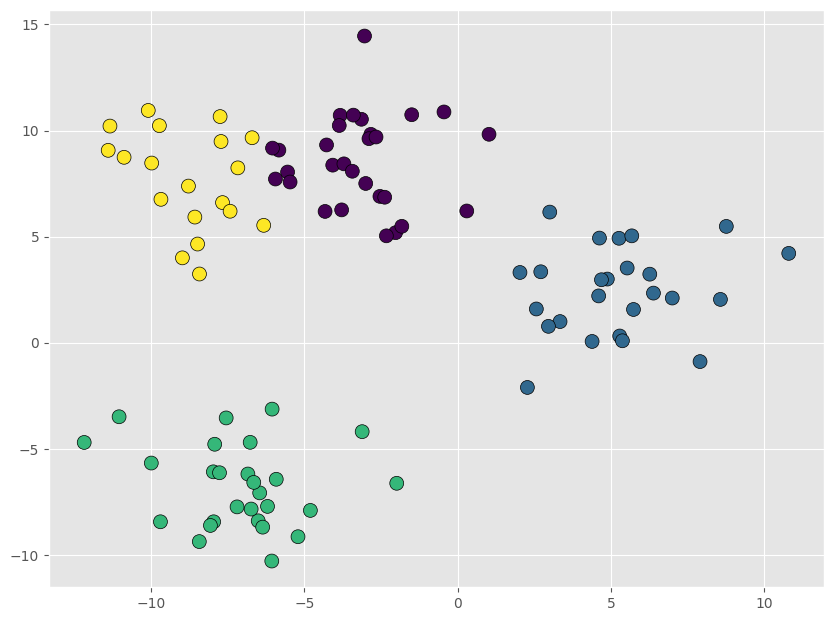

In [9]:
plt.figure(figsize = (10,7.5))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker= 'o', s=100, edgecolors='black')
plt.show()

## Exercise 9.2
### 1. The digits recognition dataset

In the following exercises, you'll be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type `Bunch`, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images, as you'll see in this exercise. On the other hand, the `'data'` key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these `Bunch` objects in two different ways: By using the `.` notation, as in `digits.images`, or the `[]` notation, as in `digits['images']`.

The MNIST data is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

#### Instructions (1 point)

- Import `datasets` from `sklearn`.
- Load the digits `dataset` using the `.load_digits()` method on datasets.
- Print the `keys()` and `DESCR` of digits.

In [10]:
# all main imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import `datasets` from `sklearn`.
from sklearn import datasets

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

#### Instructions (0.5 point)
For each image `i` in the dataset, `images[i]` contains a 2D array of pixels, and `data[i]` contains a 1D array flattened from `images[i]`.  
- Display the details of the 1011th image data
    - apply `.flatten()` method on `digits.images[1010]`, and check if it is equal to `digits.data[1010]`.

In [11]:
# note that digits.data is flattened version of digits.images
print(digits.images[1010], '\n', digits.data[1010])
print(digits.images[1010].flatten() == digits.data[1010])

[[ 0.  0.  9. 12. 12. 12.  6.  0.]
 [ 0.  1. 14.  6.  4.  4.  2.  0.]
 [ 0.  4. 15. 12.  9.  1.  0.  0.]
 [ 0.  4. 15.  8. 11. 11.  0.  0.]
 [ 0.  0.  1.  0.  0. 14.  4.  0.]
 [ 0.  0.  0.  0.  0. 10.  8.  0.]
 [ 0.  0. 10.  1.  0.  8.  8.  0.]
 [ 0.  0.  9. 16. 16. 15.  4.  0.]] 
 [ 0.  0.  9. 12. 12. 12.  6.  0.  0.  1. 14.  6.  4.  4.  2.  0.  0.  4.
 15. 12.  9.  1.  0.  0.  0.  4. 15.  8. 11. 11.  0.  0.  0.  0.  1.  0.
  0. 14.  4.  0.  0.  0.  0.  0.  0. 10.  8.  0.  0.  0. 10.  1.  0.  8.
  8.  0.  0.  0.  9. 16. 16. 15.  4.  0.]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


#### Instructions (0.5 point)
- Print the shape of `images` and `data` keys using the `.` notation.
- print out the `target` value of the 1011th image
- Display the 1011th image using `plt.imshow()`. This has been done for you.

(1797, 8, 8)
(1797, 64)
5


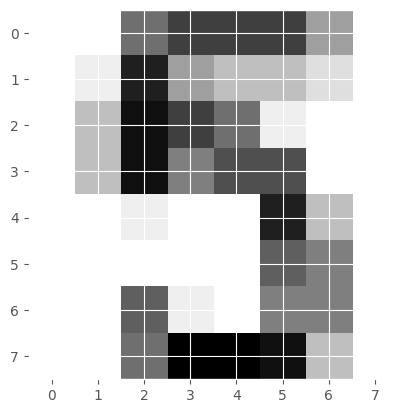

In [12]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# print out the `target` value of the 1011th image
print(digits.target[1010])
# Display the 1011th image
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

It looks like the image in question corresponds to the digit `'5'`. Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset? You'll do so in the next exercise!

### 2. Train/Test Split + Fit/Predict/Accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

#### Instructions (3 points)

- Import `KNeighborsClassifier` from `sklearn.neighbors` and `train_test_split` from `sklearn.model_selection`.
- Create an array for the features using `digits.data` and an array for the target using `digits.target`.
- Create stratified training and test sets using `0.2` for the size of the test set. Use a `random_state` of `20`. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
- Create a k-NN classifier with `7` neighbors and fit it to the training data.
- Compute and print the accuracy of the classifier's predictions using the `.score()` method. The accuracy should be computed on the test data (not the training data).

In [14]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy. The accuracy should be computed on the test data (not the training data).
print(knn.score(X_test, y_test))

0.9833333333333333


Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with **98% accuracy**, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

### 3. Overfitting and underfitting

Remember the model complexity curve? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as `X_train`, `X_test`, `y_train`, `y_test`. In addition, `KNeighborsClassifier` has been imported from `sklearn.neighbors`.

#### Instructions (3 points)

- Inside the for loop:
    - Setup a k-NN classifier with the number of neighbors equal to `k`.
    - Fit the classifier with `k` neighbors to the training data.
     - Compute accuracy scores of the training set and test set separately using the `.score()` method and assign the results to the `i`th element in `train_accuracy` and `test_accuracy` arrays respectively.
    - Create separate line plots for `train_accuracy` and `test_accuracy`. Note the x axis should be `neightbors`.

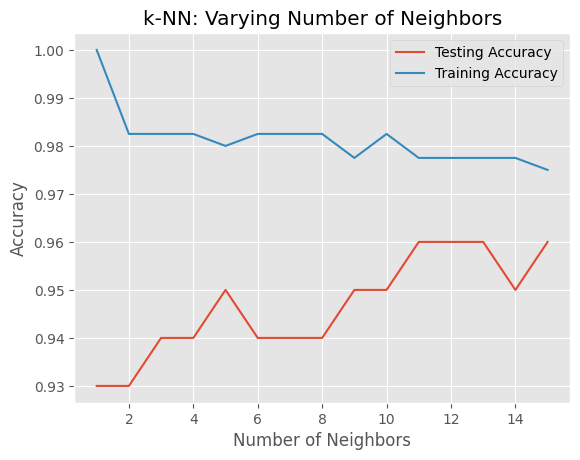

In [13]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 16) # k varies from 1 to 15
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
# plotting test accuracy
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
# plotting train accuracy
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()